In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('filtered_metadata.csv')

# Display the first few rows to verify the data
print(df.head())

       Accession ID Collection date                          Location  \
0  EPI_ISL_14729181      2022-06-20  Europe / Spain / Castilla y Leon   
1  EPI_ISL_14729175      2022-06-20  Europe / Spain / Castilla y Leon   
2  EPI_ISL_14729171      2022-06-17  Europe / Spain / Castilla y Leon   
3  EPI_ISL_14729125      2022-06-19  Europe / Spain / Castilla y Leon   
4  EPI_ISL_14729180      2022-06-20  Europe / Spain / Castilla y Leon   

   Sequence length Pango lineage  
0            29782        BA.5.1  
1            29746        BA.5.1  
2            29746      BA.5.1.3  
3            29746        BA.5.1  
4            29784        BA.5.1  


In [2]:
# Count the number of NANs (missing values) in each column
nan_counts = df.isna().sum()
print("Number of NANs in each column:")
print(nan_counts)

Number of NANs in each column:
Accession ID       0
Collection date    0
Location           0
Sequence length    0
Pango lineage      0
dtype: int64


In [3]:
# Count the number of unique values in each column
unique_counts = df.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Accession ID       15100922
Collection date        1638
Location              47414
Sequence length        1392
Pango lineage          3551
dtype: int64


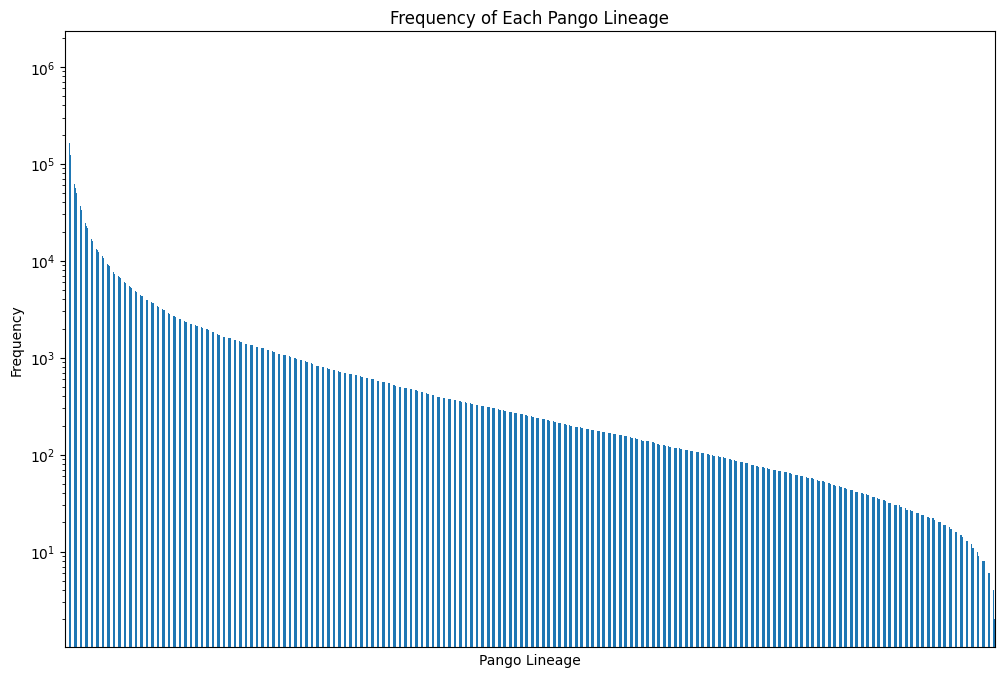

In [6]:
import matplotlib.pyplot as plt
# Calculate counts of each Pango lineage
lineage_counts = df['Pango lineage'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
lineage_counts.plot(kind='bar')
plt.title('Frequency of Each Pango Lineage')
plt.xlabel('Pango Lineage')
plt.ylabel('Frequency')

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Remove x-axis labels
plt.xticks([])

plt.show()

In [18]:
# Filter for lineages with fewer than 10 occurrences
l = 10
fewer_than_l = len(lineage_counts[lineage_counts < l])
print(f"Number of lineages with less than {l} observations: {fewer_than_l}")

l = 20
fewer_than_l = len(lineage_counts[lineage_counts < l])
print(f"Number of lineages with less than {l} observations: {fewer_than_l}")

l = 30
fewer_than_l = len(lineage_counts[lineage_counts < l])
print(f"Number of lineages with less than {l} observations: {fewer_than_l}")

Number of lineages with less than 10 observations: 63
Number of lineages with less than 20 observations: 203
Number of lineages with less than 30 observations: 363


In [15]:
import pandas as pd
import numpy as np

def calculate_capped_samples(df, m):

    # Calculate counts of each Pango lineage
    lineage_counts = df['Pango lineage'].value_counts()

    # Cap each count at m and sum the capped values
    capped_counts = np.minimum(lineage_counts, m)
    total_samples = capped_counts.sum()

    return total_samples

m = 50  # Set m to your desired cap per lineage
total_samples_after_cap = calculate_capped_samples(df, m)
print(f"Total samples after capping each lineage at {m}: {total_samples_after_cap}")

m = 75  # Set m to your desired cap per lineage
total_samples_after_cap = calculate_capped_samples(df, m)
print(f"Total samples after capping each lineage at {m}: {total_samples_after_cap}")

m = 100  # Set m to your desired cap per lineage
total_samples_after_cap = calculate_capped_samples(df, m)
print(f"Total samples after capping each lineage at {m}: {total_samples_after_cap}")

m = 150  # Set m to your desired cap per lineage
total_samples_after_cap = calculate_capped_samples(df, m)
print(f"Total samples after capping each lineage at {m}: {total_samples_after_cap}")

m = 200  # Set m to your desired cap per lineage
total_samples_after_cap = calculate_capped_samples(df, m)
print(f"Total samples after capping each lineage at {m}: {total_samples_after_cap}")

Total samples after capping each lineage at 50: 162951
Total samples after capping each lineage at 75: 232698
Total samples after capping each lineage at 100: 296706
Total samples after capping each lineage at 150: 411557
Total samples after capping each lineage at 200: 513742


In [5]:
# Extract the country from the Location column
df['Country'] = df['Location'].apply(lambda x: x.split(' / ')[1])

# Preview the result
print(df['Country'].head())

0    Spain
1    Spain
2    Spain
3    Spain
4    Spain
Name: Country, dtype: object


In [13]:
# Count the number of samples per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Samples']
country_counts['Log_Samples'] = np.log(country_counts['Samples'])

In [17]:
import plotly.express as px

# Optionally, if country names need standardization or are missing ISO codes, handle these cases
# For this example, assume country names match the ISO country names used by Plotly

# Load ISO codes if needed or manually match them
# This step is skipped here for simplicity

# Plotting the data
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Log_Samples",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title_text='Global Distribution of Samples')
fig.show()